# A note about environment
#### Mainly for me, just to remenber the correct settings
I have to create an environment using conda (with python 3.6.2, pip and other packages) and then install the required torch packages using pip (installing torch 1.9.1, torchvision 0.10.1 and torchaudio 0.9.1).  
The commands was
> `conda create --prefix PATH_TO_ENVIRONMENT python=3.6.2 pip numpy matplotlib pandas jupyterlab tqdm opencv scikit-image`
>  
> `pip3 install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html`

The `--prefix` in the creation command was used to create the environment in the user folder.  
The version of torchvision installed is 0.10.1 so I can use the `torchvision.io` module.

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
if len(human_files) == 0: # Maybe it's running local, so we'll try another path
	human_files = np.array(glob("data/lfw/*/*"))

dog_files = np.array(glob("/data/dog_images/*/*/*"))
if len(dog_files) == 0: # Maybe it's running local, so we'll try another path
	dog_files = np.array(glob("data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 1556 total human images.
There are 8350 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


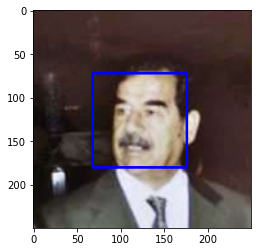

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def detect_faces(images_paths):
	face_detector_results = [face_detector(image_path) for image_path in tqdm(images_paths)]
	images_with_faces = [1 for result in face_detector_results if result == True]
	return len(images_with_faces) / len(images_paths)

faces_in_humans = detect_faces(human_files_short)
faces_in_dogs = detect_faces(dog_files_short)

print(f"Images with a face in the Humans dataset: {faces_in_humans * 100} % - Images with a face in the Dogs dataset: {faces_in_dogs * 100} %")

100%|██████████| 100/100 [00:05<00:00, 17.49it/s]

Images with a face in the Humans dataset: 100.0 % - Images with a face in the Dogs dataset: 18.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

from skimage import data
from skimage.feature import Cascade

def face_detector_with_scikit(img_path):
	image = cv2.imread(img_path)

	model_data = data.lbp_frontal_face_cascade_filename()
	model_scikit = Cascade(model_data)

	faces_detected = model_scikit.detect_multi_scale(image, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123))
	return len(faces_detected) >= 1

def detect_faces_with_scikit(images_paths):
	face_detector_results = [face_detector_with_scikit(image_path) for image_path in tqdm(images_paths)]
	images_with_faces = [1 for result in face_detector_results if result == True]
	return len(images_with_faces) / len(images_paths)

faces_in_humans_with_scikit = detect_faces_with_scikit(human_files_short)
faces_in_dogs_with_scikit = detect_faces_with_scikit(dog_files_short)

print(f"Detection with Scikit Learn: Images with a face in the Humans dataset: {faces_in_humans_with_scikit * 100} % - Images with a face in the Dogs dataset: {faces_in_dogs_with_scikit * 100} %")

100%|██████████| 100/100 [00:07<00:00, 14.07it/s]

Detection with Scikit Learn: Images with a face in the Humans dataset: 78.0 % - Images with a face in the Dogs dataset: 8.0 %


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)

    transformations = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation
    
    image = transformations(image) # apply transformations to the image

    image = torch.unsqueeze(image, 0) # add a dimension because the model expect a batch of images

    if use_cuda:
        image = image.cuda()

    VGG16.eval() # change to evaluation mode, just to be sure (I think that VGG does not need this)

    predictions = VGG16(image)

    predictions = torch.squeeze(predictions, 0) # remove the artificial dimension added before
    
    index = torch.argmax(predictions)

    if use_cuda:
        index = index.cpu()
    
    return index.item() # predicted class index

## Imagenet classes Load
I'll load Imagenet classes just to know the meaning of the class (can be useful for other project too).

In [8]:
import pandas as pd
classes = pd.read_csv("imagenet_classes.txt")
classes.head()

,class_id,name,description
0,0,tench,"tench, Tinca tinca"
1,1,goldfish,"goldfish, Carassius auratus"
2,2,great_white_shark,"great white shark, white shark, man-eater, man..."
3,3,tiger_shark,"tiger shark, Galeocerdo cuvieri"
4,4,hammerhead,"hammerhead, hammerhead shark"


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
MIN_DOG_CLASS_INDEX = 151
MAX_DOG_CLASS_INDEX = 268

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = VGG16_predict(img_path)
    
    return (class_index >= MIN_DOG_CLASS_INDEX) and (class_index <= MAX_DOG_CLASS_INDEX) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def detect_dogs(images_paths):
	dog_detector_results = [dog_detector(image_path) for image_path in tqdm(images_paths)]
	images_with_dogs = [1 for result in dog_detector_results if result == True]
	return len(images_with_dogs) / len(images_paths)

dogs_in_humans = detect_dogs(human_files_short)
dogs_in_dogs = detect_dogs(dog_files_short)

print(f"Images with a dog in the Humans dataset: {dogs_in_humans * 100} % - Images with a dog in the Dogs dataset: {dogs_in_dogs * 100} %")

100%|██████████| 100/100 [00:01<00:00, 80.64it/s]

Images with a dog in the Humans dataset: 1.0 % - Images with a dog in the Dogs dataset: 94.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

RESNET18 = models.resnet18(pretrained=True)

if use_cuda:
    RESNET18 = RESNET18.cuda()

def RESNET18_predict(img_path):
    image = Image.open(img_path)

    transformations = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation
    
    image = transformations(image) # apply transformations to the image

    image = torch.unsqueeze(image, 0) # add a dimension because the model expect a batch of images

    if use_cuda:
        image = image.cuda()

    RESNET18.eval() # change to evaluation mode, just to be sure (I think that VGG does not need this)

    predictions = RESNET18(image)

    predictions = torch.squeeze(predictions, 0) # remove the artificial dimension added before
    
    index = torch.argmax(predictions)

    if use_cuda:
        index = index.cpu()
    
    return index.item() # predicted class index

def dog_detector_with_RESNET18(img_path):
    ## TODO: Complete the function.
    class_index = RESNET18_predict(img_path)
    
    return (class_index >= MIN_DOG_CLASS_INDEX) and (class_index <= MAX_DOG_CLASS_INDEX) # true/falsedef dog_detector(img_path):
    ## TODO: Complete the function.
    class_index = RESNET18_predict(img_path)
    
    return (class_index >= MIN_DOG_CLASS_INDEX) and (class_index <= MAX_DOG_CLASS_INDEX) # true/false

def detect_dogs_with_RESNET18(images_paths):
    dog_detector_results = [dog_detector_with_RESNET18(image_path) for image_path in tqdm(images_paths)]
    images_with_dogs = [1 for result in dog_detector_results if result == True]
    return len(images_with_dogs) / len(images_paths)

dogs_in_humans_with_RESNET18 = detect_dogs_with_RESNET18(human_files_short)
dogs_in_dogs_with_RESNET18 = detect_dogs_with_RESNET18(dog_files_short)

print(f"Detection with RESNET18: Images with a dog in the Humans dataset: {dogs_in_humans_with_RESNET18 * 100} % - Images with a dog in the Dogs dataset: {dogs_in_dogs_with_RESNET18 * 100} %")

100%|██████████| 100/100 [00:00<00:00, 103.22it/s]

Detection with RESNET18: Images with a dog in the Humans dataset: 3.0 % - Images with a dog in the Dogs dataset: 93.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/vision/stable/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](https://pytorch.org/vision/stable/transforms.html)!

**Warning**  
I've found that this image cannot be loaded: `data/dog_images/train\098.Leonberger\Leonberger_06571.jpg`  
When the loader calls this method `img.convert('RGB')` I get this error: `image file is truncated (150 bytes not processed)`  
So I deleted the image (there are similar images in the same folder).

**Some statistics about the Dog Datasets:**  
- Total: 8,350 images (was 8,351 originally), 1,147,293,151 bytes (was 1,147,674,093 bytes originally)
- Train: 6,679 images (was 6,680 originally), 931,503,820 bytes (was 931,884,762 bytes originally)
- Validation: 835 images, 109,623,302 bytes
- Test: 836 images, 106,166,029 bytes
- Average size of the images: 134 KB

Each folder (train, valid, test) has 133 subfolders, corresponding to the class of the images, so there are 133 classes in each datasets.

In [12]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transformations = transforms.Compose([
	transforms.Resize(256),
	transforms.ColorJitter(brightness=0.1, contrast=0.1),
	transforms.GaussianBlur(kernel_size=3),
	transforms.RandomRotation(5),
	transforms.RandomCrop(250),
	transforms.RandomHorizontalFlip(0.5),
	transforms.CenterCrop(224),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation

test_valid_transformations = transforms.Compose([
	transforms.Resize(256),
	transforms.CenterCrop(224),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation

batch_size = 32

train_data = datasets.ImageFolder("data/dog_images/train", transform=train_transformations)
validation_data = datasets.ImageFolder("data/dog_images/valid", transform=test_valid_transformations)
test_data = datasets.ImageFolder("data/dog_images/test", transform=test_valid_transformations)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
loaders_scratch = {"train": train_loader, "valid": validation_loader, "test": test_loader}

Just show some loaded and transformed images to see what happens

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


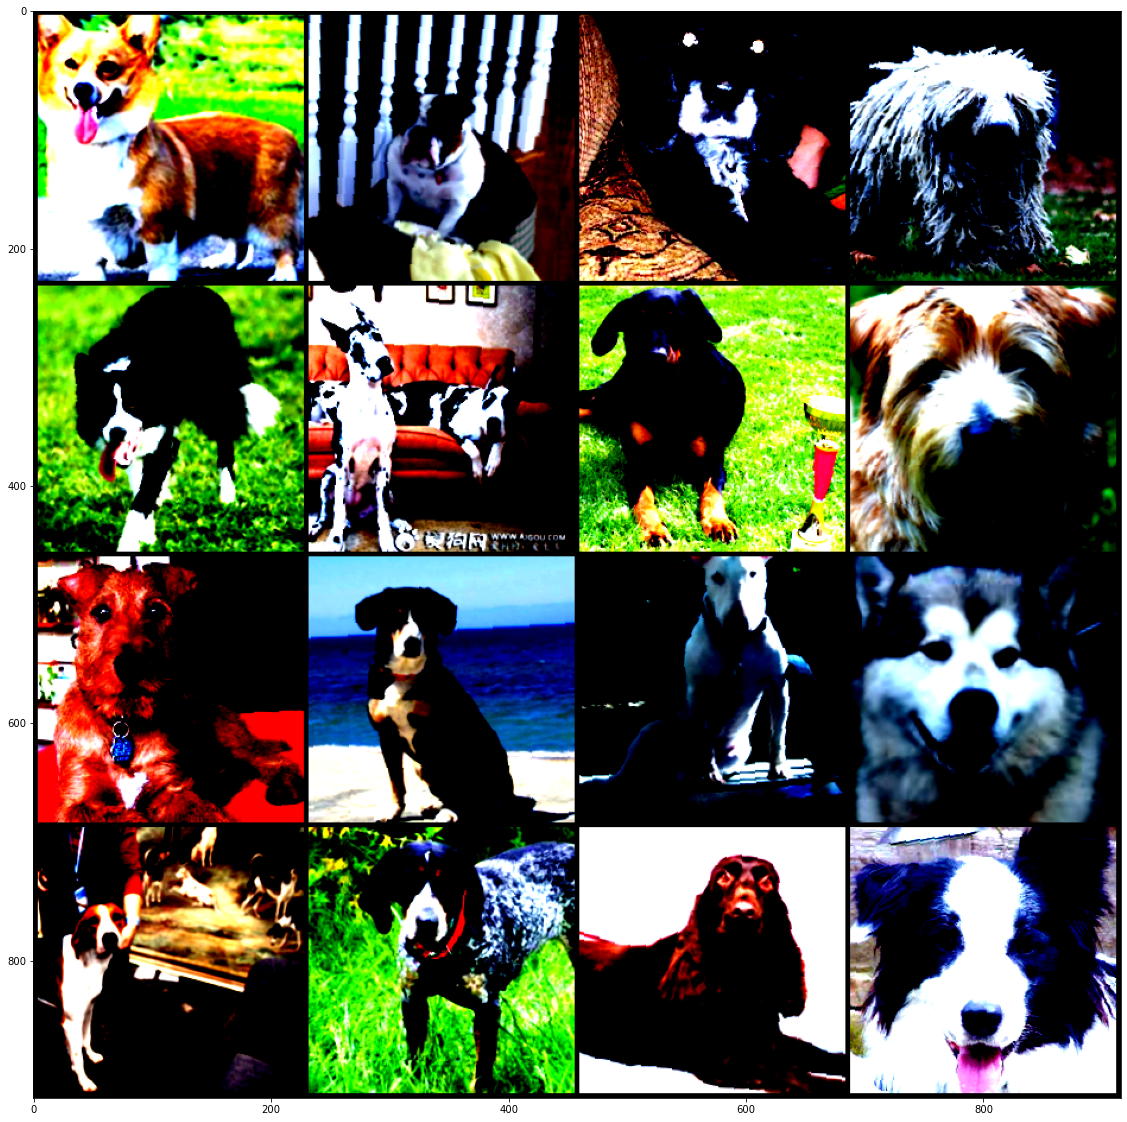

In [13]:
from torchvision.utils import make_grid

_, axis = plt.subplots(figsize=(20,20))

batch = next(iter(train_loader)) # returns a list with the list of images as first item and the list of targets as second item
images = batch[0][:16] # Get first 16 images to show in a 4x4 grid

axis.imshow(make_grid(images, 4, 4).permute(1, 2, 0))


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
VGG16 achieves a good accuracy, so I'll use it as inspiration.
Inputs are often resized as batches of 64 RGB images with dimensions of 224x224, so I'll resize images to these dimensions.  
VGG16 uses 13 convolutional layers and 3 linear layers, so I'll use a similar structure.
I'll try to use the Resnet trick (blocks of two convolutional layers that add inputs to outputs) and Batch Normalization to reduce the vanishing gradient problems.  
I've found an explanation of Residual Block in this paper: [Residual blocks — Building blocks of ResNet](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec).  
I'll use the structure marked as **(e)** in the figure [Types of Residual Block](https://miro.medium.com/max/1225/1*FqmD91PvbH7NKCnQWFJxvg.png) found in the cited article.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
# Print VGG16 structure to use as a base for the model from scratch
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
# Print RESNET18 structure to use as a base for the model from scratch
print(RESNET18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class

    class ResNetBlock(nn.Module):
        def __init__(self, channels, size) -> None:
            super().__init__()

            self.sequential = nn.Sequential(*self._create_block(channels))
            self.pooling = nn.AdaptiveAvgPool2d(size)
        
        def forward(self, data):
            current = data.clone()
            current = self.sequential(current)
            data += current
            data = self.pooling(data)
            return data

        def _create_block(self, channels):
            batch_norm_01 = nn.BatchNorm2d(channels)
            relu_01 = nn.ReLU(inplace=True)
            conv_01 = nn.Conv2d(channels, channels, kernel_size=3, padding='same')
            batch_norm_02 = nn.BatchNorm2d(channels)
            relu_02 = nn.ReLU(inplace=True)
            conv_02 = nn.Conv2d(channels, channels, kernel_size=3, padding='same')
            return [batch_norm_01, relu_01, conv_01, batch_norm_02, relu_02, conv_02]

    def __init__(self):
        super(Net, self).__init__()

        ## Define layers of a CNN

        self.layers = []

        self.conv01 = nn.Conv2d(3, 32, kernel_size=(3, 3), padding='same')

        self.resnet_block_01 = self.ResNetBlock(32, 224)
        self.resnet_block_02 = self.ResNetBlock(32, 112)
        self.resnet_block_03 = self.ResNetBlock(32, 56)
        self.resnet_block_04 = self.ResNetBlock(32, 28)

        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5, inplace=True)
        self.linear = nn.Linear(in_features=28*28*32, out_features=133)

    def forward(self, data):
        ## Define forward behavior

        data = self.conv01(data)

        data = self.resnet_block_01(data)
        data = self.resnet_block_02(data)
        data = self.resnet_block_03(data)
        data = self.resnet_block_04(data)

        data = self.flatten(data)
        data = self.dropout(data)
        data = self.linear(data)
        return data
    
    def _create_residual_block(self, channels):
        batch_norm_01 = nn.BatchNorm2d(channels)
        relu_01 = nn.ReLU(inplace=True)
        conv_01 = nn.Conv2d(channels, channels, kernel_size=3, padding='same')
        batch_norm_02 = nn.BatchNorm2d(channels)
        relu_02 = nn.ReLU(inplace=True)
        conv_02 = nn.Conv2d(channels, channels, kernel_size=3, padding='same')
        return [batch_norm_01, relu_01, conv_01, batch_norm_02, relu_02, conv_02]

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv01): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (resnet_block_01): ResNetBlock(
    (sequential): Sequential(
      (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): ReLU(inplace=True)
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): ReLU(inplace=True)
      (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    )
    (pooling): AdaptiveAvgPool2d(output_size=224)
  )
  (resnet_block_02): ResNetBlock(
    (sequential): Sequential(
      (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): ReLU(inplace=True)
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): ReLU(inplace=True)
      (5): Conv2d(32, 3

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
I'll try to use Resnet blocks because seems to be very powerful  
I prefer to use layers instead of functional so printing the model I can get the entire structure, including the activation functions  
Initially I trained the model on a notebook using CPU with a batch size of 256 images and learning rate of 0.1:
- 1 Epoch last 41m 17s
- Training Loss: 4.991529
- Validation Loss: 4.969091

Then I used a GPU on a desktop computer with a batch size of 16 and a learning rate of 0.0001:
- 100 Epochs last 100m
- Traning Loss: 0.003
- Validation Loss: 66.7

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR # Importing Learning Rate Scheduler

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.01)

scheduler_scratch = StepLR(optimizer_scratch, step_size=20, gamma=0.5) # Configuring Learning Rate Scheduler

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

TRAIN: Epoch = 1 - Batch Number = 1 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 100 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 200 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 209 - Batch Length = 23
VALIDATION: Epoch = 1 - Batch Number = 1 - Batch Length = 32
VALIDATION: Epoch = 1 - Batch Number = 25 - Batch Length = 32
VALIDATION: Epoch = 1 - Batch Number = 27 - Batch Length = 3
Epoch: 1 	Learning Rate: 0.010000
	Training Loss: 89.513954 	Validation Loss: 16.207876 
	Training Accuracy: 1.36% (91/6679)	Validation Accuracy: 2.28% (19/835)
Saving model: Training Loss: 89.513954 - Validation Loss: 16.207876 - Training Accuracy: 1.36% (91/6679) - Validation Accuracy: 2.28% (19/835)
TRAIN: Epoch = 2 - Batch Number = 1 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 100 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 200 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 209 - Batch Length = 23
VALIDATION: Epoch = 2 - Batch Number = 1 - Batch Len

<All keys matched successfully>

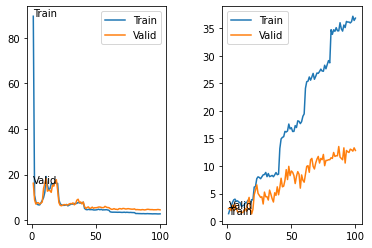

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler=None, use_model_versioning=False):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    _, (loss_plot, accuracy_plot) = plt.subplots(1, 2, gridspec_kw={"wspace": 0.4})
    loss_plot.set_xlabel = "Epoch"
    loss_plot.set_ylabel = "Loss"
    accuracy_plot.set_xlabel = "Epoch"
    accuracy_plot.set_ylabel = "Accuracy"

    model_number = 0
    model_file = ""
    
    for epoch in range(1, n_epochs + 1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        train_correct = 0
        train_total = 0
        valid_correct = 0
        valid_total = 0

        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            train_total += len(data)

            if ((batch_idx + 1) == 1) or \
                    ((batch_idx + 1) % 100 == 0) or \
                        ((batch_idx + 1) == len(loaders['train'])):
                print(f"TRAIN: Epoch = {epoch} - Batch Number = {batch_idx + 1} - Batch Length = {len(data)}")

            optimizer.zero_grad() # Reset gradients
            train_output = model(data) # Calculate the results
            actual_loss = criterion(train_output, target) # Calculate the error
            actual_loss.backward() # Calculate the gradients
            optimizer.step() # Update model parameters
            train_loss += ((1 / (batch_idx + 1)) * (actual_loss.data - train_loss)) # Update the loss

            train_predictions = train_output.data.max(1, keepdim=True)[1]
            train_correct += np.sum(np.squeeze(train_predictions.eq(target.data.view_as(train_predictions)).cpu().numpy()))
        
        train_accuracy = 100.0 * train_correct / train_total

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            valid_total += len(data)

            if ((batch_idx + 1) == 1) or \
                    ((batch_idx + 1) % 25 == 0) or \
                        ((batch_idx + 1) == len(loaders['valid'])):
                print(f"VALIDATION: Epoch = {epoch} - Batch Number = {batch_idx + 1} - Batch Length = {len(data)}")
            
            valid_output = model(data) # Calculate the results
            actual_loss = criterion(valid_output, target) # Calculate the error
            valid_loss += ((1 / (batch_idx + 1)) * (actual_loss.data - valid_loss)) # Update the loss

            valid_predictions = valid_output.data.max(1, keepdim=True)[1]
            valid_correct += np.sum(np.squeeze(valid_predictions.eq(target.data.view_as(valid_predictions)).cpu().numpy()))
            
        valid_accuracy = 100.0 * valid_correct / valid_total

        if scheduler is None:
            # print training/validation statistics
            message = "Epoch: {}" + \
                "\r\n\tTraining Loss: {:.6f} " + \
                    "\tValidation Loss: {:.6f} "+ \
                        "\r\n\tTraining Accuracy: {:.2f}% ({}/{})" + \
                            "\tValidation Accuracy: {:.2f}% ({}/{})"
            print(message.format(
                epoch,
                train_loss,
                valid_loss,
                train_accuracy,
                train_correct,
                train_total,
                valid_accuracy,
                valid_correct,
                valid_total
            ))
        else:
            current_learning_rate = scheduler.get_last_lr()[-1] # Saving current Learning Rate to show in the log message

            scheduler.step() # Updating Learning Rate

            # print training/validation statistics
            message = "Epoch: {} \tLearning Rate: {:.6f}" + \
                "\r\n\tTraining Loss: {:.6f} " + \
                    "\tValidation Loss: {:.6f} "+ \
                        "\r\n\tTraining Accuracy: {:.2f}% ({}/{})" + \
                            "\tValidation Accuracy: {:.2f}% ({}/{})"
            print(message.format(
                epoch,
                current_learning_rate,
                train_loss,
                valid_loss,
                train_accuracy,
                train_correct,
                train_total,
                valid_accuracy,
                valid_correct,
                valid_total
            ))
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accuracies.append(train_accuracy)
        valid_accuracies.append(valid_accuracy)

        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f"Saving model: Training Loss: {train_loss:.6f} - Validation Loss: {valid_loss:.6f} - " + \
                f"Training Accuracy: {train_accuracy:.2f}% ({train_correct}/{train_total}) - " + \
                f"Validation Accuracy: {valid_accuracy:.2f}% ({valid_correct}/{valid_total})")
            valid_loss_min = valid_loss
            
            # It seems that when saving large file, the file it's not close properly.
            # I've tried several workarounds (open and closing explicitly, deleting if exists, using a delay, etc.) 
            # but nothing worked, so I'll save every model in a new file and finally I'll rename the last model 
            # with the correct name
            # torch.save(model.state_dict(), save_path)
            if not use_model_versioning:
                torch.save(model.state_dict(), save_path)
            else:
                model_number += 1
                model_file = f"{save_path.replace('.pt', '')}_{model_number}.pt"
                torch.save(model.state_dict(), model_file)

    loss_plot.plot(range(1, n_epochs + 1), train_losses, label="Train")
    loss_plot.plot(range(1, n_epochs + 1), valid_losses, label="Valid")
    loss_plot.legend()
    loss_plot.text(1, train_losses[0], "Train")
    loss_plot.text(1, valid_losses[0], "Valid")
    accuracy_plot.plot(range(1, n_epochs + 1), train_accuracies, label="Train")
    accuracy_plot.plot(range(1, n_epochs + 1), valid_accuracies, label="Valid")
    accuracy_plot.legend()
    accuracy_plot.text(1, train_accuracies[0], "Train")
    accuracy_plot.text(1, valid_accuracies[0], "Valid")

    if use_model_versioning:
        if os.path.exists(save_path):
            os.remove(save_path)
        os.rename(model_file, save_path)
    
    # return trained model
    return model

# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt', scheduler_scratch)

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred)).cpu().numpy()))
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.310604


Test Accuracy: 15% (130/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders
train_transformations = transforms.Compose([
	transforms.Resize(256),
	transforms.ColorJitter(brightness=0.1, contrast=0.1),
	transforms.GaussianBlur(kernel_size=3),
	transforms.RandomRotation(5),
	transforms.RandomCrop(250),
	transforms.RandomHorizontalFlip(0.5),
	transforms.CenterCrop(224),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation

test_valid_transformations = transforms.Compose([
	transforms.Resize(256),
	transforms.CenterCrop(224),
	transforms.ToTensor(),
	transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation

batch_size = 32

train_data = datasets.ImageFolder("data/dog_images/train", transform=train_transformations)
validation_data = datasets.ImageFolder("data/dog_images/valid", transform=test_valid_transformations)
test_data = datasets.ImageFolder("data/dog_images/test", transform=test_valid_transformations)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
loaders_transfer = {"train": train_loader, "valid": validation_loader, "test": test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze all layers
for parameter in model_transfer.parameters():
    parameter.requires_grad = False

last_layer = model_transfer.classifier[-1]
classification_layer = nn.Linear(in_features=last_layer.in_features, out_features=133, bias=True)
model_transfer.classifier[-1] = classification_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

I'll try with the VGG16 network used earlier as a starting point. I'll prepare the new network with this steps:  
- freeze of all the weights in the `features` section the model, to avoid changing trained parameters; layers in the `classifier` section will be left unfreezed, so these layers will be trained on the specific classes of the problem 
- replace the last layer with a new layer because the last layer outputs 1,000 classes, but we need only 133 classes

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [22]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[-1].parameters(), lr = 0.01)
scheduler_transfer = StepLR(optimizer_transfer, step_size=2, gamma=0.5) # Configuring Learning Rate Scheduler

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

TRAIN: Epoch = 1 - Batch Number = 1 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 100 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 200 - Batch Length = 32
TRAIN: Epoch = 1 - Batch Number = 209 - Batch Length = 23
VALIDATION: Epoch = 1 - Batch Number = 1 - Batch Length = 32
VALIDATION: Epoch = 1 - Batch Number = 25 - Batch Length = 32
VALIDATION: Epoch = 1 - Batch Number = 27 - Batch Length = 3
Epoch: 1 	Learning Rate: 0.010000
	Training Loss: 3.868578 	Validation Loss: 2.321640 
	Training Accuracy: 59.37% (3965/6679)	Validation Accuracy: 76.65% (640/835)
Saving model: Training Loss: 3.868578 - Validation Loss: 2.321640 - Training Accuracy: 59.37% (3965/6679) - Validation Accuracy: 76.65% (640/835)
TRAIN: Epoch = 2 - Batch Number = 1 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 100 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 200 - Batch Length = 32
TRAIN: Epoch = 2 - Batch Number = 209 - Batch Length = 23
VALIDATION: Epoch = 2 - Batch Number = 1 - Bat

<All keys matched successfully>

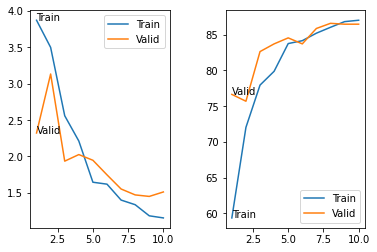

In [23]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt', scheduler_transfer, True)

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.731163


Test Accuracy: 85% (713/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [25]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)

    transformations = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]) # The Normalize transformation was specified in the Torchvision documentation
    
    image = transformations(image) # apply transformations to the image

    image = torch.unsqueeze(image, 0) # add a dimension because the model expect a batch of images

    if use_cuda:
        image = image.cuda()

    model_transfer.eval() # change to evaluation mode, just to be sure (I think that VGG does not need this)

    predictions = model_transfer(image)

    predictions = torch.squeeze(predictions, 0) # remove the artificial dimension added before
    
    index = torch.argmax(predictions)

    if use_cuda:
        index = index.cpu()
    
    return class_names[index.item()] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [26]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        dog_breed = predict_breed_transfer(img_path)
        print(f"In the image there is a DOG. It's breed is {dog_breed}")
    elif face_detector(img_path):
        resembling_breed = predict_breed_transfer(img_path)
        print(f"In the image there is an HUMAN. It's resembling breed is {resembling_breed}")
    else:
        print("ERROR: neither dog neither human detected!")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [27]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

images_samples = np.array(["images/Labrador_retriever_06457.jpg", "data/lfw/Sally_Field/Sally_Field_0003.jpg", "images/example_image.jpg"])

for image_sample in images_samples:
    run_app(image_sample)


In the image there is an HUMAN. It's resembling breed is Doberman pinscher
In the image there is an HUMAN. It's resembling breed is Silky terrier
In the image there is an HUMAN. It's resembling breed is Doberman pinscher
In the image there is a DOG. It's breed is Affenpinscher
In the image there is a DOG. It's breed is Affenpinscher
In the image there is a DOG. It's breed is Affenpinscher
In the image there is a DOG. It's breed is Labrador retriever
In the image there is an HUMAN. It's resembling breed is Yorkshire terrier
ERROR: neither dog neither human detected!
